# CLASE 2.4: Regresión.
---

## Introducción.
A continuación, vamos a abordar uno de los problemas más insignes del **aprendizaje supervisado**, y que ya (más o menos) presentamos en secciones anteriores, pero ahora ya con todo detalle y con el objetivo de estructurar un marco de referencia similar al que construimos para los **modelos de clasificación**: En concreto, intentaremos (de la forma más general posible) resolver el problema de ajustar una función $f$ (que ya formalizaremos en términos fondo y estructura) a un conjunto de $m$ pares de la forma $(\mathbf{x}_{1}, y_{1}),...,(\mathbf{x}_{n}, y_{n})$, donde $\mathbf{x}_{i}\in \mathbb{R}^{n}$ e $y_{i}\in \mathbb{R}$, con la importante condición de que $y_{i}$ ahora puede tomar un número virtualmente infinito de valores. Esto difiere enormemente del **problema de clasificación** tratado en la [clase 2.3](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_3.ipynb), porque el vector $\mathbf{y}=(y_{1},...,y_{m})\in \mathbb{R}^{m}$ ya no representa un número (muy) limitado de clases o categorías, sino que ahora puede idealizarse como una *muestra* de una variable aleatoria continua (digamos $Y$), en general, desconocida. El problema así definido se conoce como **problema de regresión**.

Consideremos un conjunto de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$. Sea $\mathbf{x}_{i}\in \mathbb{R}^{n}$ la fila o instancia $i$-ésima de la matriz de datos de entrada $\mathbf{X}$. En el problema de regresión, estamos interesados en construir una función $f$ que permita *estimar* el valor de $y_{i}$ en función de los valores que componen $\mathbf{x}_{i}$ (para todo $i=1,...,m$), de tal forma que dicha estimación, que llamamos $\hat{y}_{i}$, pueda expresarse por medio de la ecuación 

$$\hat{y}_{i}=f(\mathbf{x}_{i});\ \forall i=1,...,m$$
<p style="text-align: right;">$(4.1)$</p>

Un modelo así definido es llamado, consecuentemente, **modelo de regresión**.

En un contexto práctico, en general, la ecuación (4.1) no describe a este problema de forma *completa*, porque es común que los datos que constituyen la matriz $\mathbf{X}$ se encuentren *alterados* o *corrompidos* por un nivel aleatorio de **ruido**. Entenderemos este último término como una modificación (de naturaleza aleatoria) no deseada propia de una muestra de datos asociados a una variable independiente, que puede ser consecuencia del proceso de captura de los datos, su almacenamiento y/o, incluso, su transmisión. De esta manera, el modelo de regresión se reescribe considerando un término de ruido $\epsilon$, tal que

$$\hat{y}_{i}=f(\mathbf{x}_{i})+ \epsilon;\ \forall i=1,...,m$$
<p style="text-align: right;">$(4.2)$</p>

Durante el resto de esta sección, salvo que se diga lo contrario, $\epsilon$ será una variable aleatoria normalmente distribuida y con media nula, que correspondientemente llamaremos **ruido Gaussiano** asociado a la observación y/o medición de nuestros datos de entrada.

Naturalmente, como en el caso de los modelos de clasificación, estamos interesados en que la función $f$ no solamente *estime* adecuadamente los valores de $\mathbf{y}$ en el conjunto de entrenamiento, sino que además *generalice* su aprendizaje sobre datos de prueba (es decir, valores de $\mathbf{y}$ que no fueron *vistos* por el correspondiente algoritmo de aprendizaje durante el entrenamiento).

La regresión es uno de los elementos fundamentales del aprendizaje automático, siendo un problema que aparece en prácticamente todas las áreas de la ciencia y la ingeniería. Áreas de gran interés en investigación donde los modelos de regresión son protagonistas corresponden al análisis de series de tiempo (fundamental en ciencias sociales), robótica y automatización (donde comienza a ser un arco integral de los algoritmos de **aprendizaje por reforzamiento**), aprendizaje profundo, entre otros.

La **elección** de la **función regresora** $f$ es una cuestión fundamental en este problema. Y para ello, existe una serie de enfoques y técnicas, al igual que en el caso de los modelos de clasificación. En una primera aproximación, vamos a tratar el **modelo de regresión lineal**, para el cual $f$ no será más que una transformación afin aplicada sobre los datos de entrada. Sin embargo, antes de apresurarnos a *juzgar* la simplicidad de este tipo de modelos, es bueno remarcar que haremos el esfuerzo de desarrollar la teoría subyacente a los modelos de regresión lineal de la forma más general que podamos, a fin de incorporar modelos más complejos sin abandonar la condición de que éstos puedan expresarse por medio de una función lineal.

## Regresión lineal.

### Descripción del problema.
Partiremos pues con el más elemental de los modelos de regresión, y también el más fundamental. En un contexto bien general, el problema inherente al modelo de regresión lineal puede expresarse como sigue: Dado un conjunto de datos $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R} \right\}$, donde $\mathbf{x}_{i}\in \mathbb{R}^{n}$ representa una fila o instancia $i$-ésima de la matriz de datos de entrada $\mathbf{X}$, siendo $m$ el total de instancias de $\mathcal{D}$, asumiremos que la relación entre los pares $\left( \mathbf{x}_{1} ,y_{1}\right)  ,...,\left( \mathbf{x}_{m} ,y_{m}\right)$ es de tipo lineal. Es decir, buscamos un estimador del tipo

$$y_{i}=w_{0}+w_{1}x_{i1}+\cdots +w_{n}x_{in}+\varepsilon_{i} \  ;\  \forall i=1,...,m$$
<p style="text-align: right;">$(4.3)$</p>

donde $x_{ij}$ representa la $i$-ésima instancia asociada a la $j$-ésima variable independiente en la matriz $\mathbf{X}$. La ecuación (4.3) representa por tanto al **modelo de regresión lineal**, siendo $\varepsilon_{i}$ un término de ruido asociado a la $i$-ésima instancia observada de $\mathcal{D}$. La **función regresora** en este caso es, por tanto, una **transformación afín sencilla** que establece que el modelo es simplemente una combinación lineal entre los valores de entrada asociados a cada instancia y una serie de parámetros $w_{1},...,w_{n}$, llamados **coeficientes** o **pesos** del modelo, siendo $w_{0}$ el correspondiente **parámetro de sesgo** o **coeficiente de intercepción**. 

Podemos adoptar una notación matricial para condensar la fórmula (4.4) para el caso de las $m$ instancias de $\mathcal{D}$. Agrupando los coeficientes del modelo en un único vector, definido como $\mathbf{w}=(w_{0}, w_{1},...,w_{n})\in \mathbb{R}^{n+1}$ y agregando un $1$ a la izquierda de cada instancia $\mathbf{x}_{i}$, la ecuación (4.3) se reduce a

$$y_{i}=\mathbf{x}^{\top }_{i} \mathbf{w} +\varepsilon_{i} \  ;\  \forall i=1,...,m$$
<p style="text-align: right;">$(4.4)$</p>

Para el conjunto $\mathcal{D}$ completo, si agrupamos todos los términos de ruido en un vector $\mathbf{\varepsilon}=(\varepsilon_{1},...,\varepsilon_{m})\in \mathbb{R}^{m}$, llegamos a la **forma matricial** del modelo de regresión lineal,

$$\mathbf{y} =\mathbf{X}^{\ast} \mathbf{w} +\mathbf{\varepsilon } $$
<p style="text-align: right;">$(4.5)$</p>

Donde $\mathbf{X}^{\ast}$ es la matriz resultante de agregar una columna únicamente conformada por $1$s a la izquierda de $\mathbf{X}$. Es decir,

$$\underbrace{\left( \begin{matrix}y_{1}\\ y_{2}\\ \vdots \\ y_{m}\end{matrix} \right)  }_{\mathbf{y} \in \mathbb{R}^{m\times 1} } =\underbrace{\left( \begin{matrix}1&x_{11}&\cdots &x_{1n}\\ 1&x_{21}&\cdots &x_{2n}\\ \vdots &\vdots &\ddots &\vdots \\ 1&x_{m1}&\cdots &x_{mn}\end{matrix} \right)  }_{\mathbf{X}^{\ast } \in \mathbb{R}^{m\times n+1} } \underbrace{\left( w_{0},w_{1},...,w_{n}\right)  }_{\mathbf{w} \in \mathbb{R}^{n+1} } +\underbrace{\left( \begin{matrix}\varepsilon_{1} \\ \varepsilon_{2} \\ \vdots \\ \varepsilon_{m} \end{matrix} \right)  }_{\mathbf{\varepsilon } \in \mathbb{R}^{m\times 1} } $$
<p style="text-align: right;">$(4.6)$</p>

El modelo de regresión lineal contempla, para su correcta implementación, una serie de supuestos relativos a las $n$ variables independientes que constituyen la matriz $\mathbf{X}$, la variable de respuesta $\mathbf{y}$ y las relaciones entre ellas. Debido a la longevidad de este modelo, se han publicado un sinnúmero de investigaciones que han permitido relajar algunos de estos supuestos (o, como mínimo, expresar una versión *débil* de los mismos), aunque muchas veces tales consideraciones implicarán el aumento en la complejidad de cada implementación, o bien, mayores exigencias en términos de los datos (por ejemplo, una cantidad mínima significativa de observaciones), a fin de poder garantizar soluciones de mayor precisión.

Algunos de los supuestos más generales para el modelo de regresión lineal, en su forma más clásica, son:

- **Exogeneidad débil:** Este supuesto hace referencia esencialmente al hecho de que cada una de las variables independientes $\mathbf{x}_{1},...,\mathbf{x}_{n}\in \mathbb{R}^{m}$ que comprenden la matriz de datos de entrada $\mathbf{X}$ puede ser tratada como un conjunto fijo de datos, y no como la realización de alguna variable aleatoria determinada. En la práctica, ésto significa que las variables que constituyen el conjunto de datos no se encuentran *contaminados* por errores de muestreo. Indudablemente, se trata de un supuesto difícil de cumplir en la realidad, porque esto implica que no existe ruido en el muestreo de ninguna de las variables independientes de interés.
- **Linealidad:** Asumimos que la variable de respuesta $\mathbf{y}$ es, en efecto, una combinación lineal de las variables de entrada con respecto a una serie de ponderadores o parámetros desconocidos, que se corresponden con los **coeficientes de regresión**. Observemos que este supuesto no es demasiado restrictivo, ya que al tratar a cada variable independiente como un conjunto de datos fijo (supuesto de exogeneidad débil), la linealidad únicamente constituye una restricción sobre los parámetros de la regresión. De esta manera, las variables independientes pueden ser transformadas arbitrariamente e, inclusive, podemos añadir múltiples copias o *redundancias* de la misma variable independiente al modelo, cada una de ellas transformada de manera diferente. Un ejemplo de lo anterior es el **modelo de regresión polinomial**, donde simplemente se aplica un procedimiento de regresión lineal sobre un polinomio de grado fijo (siendo éste un hiperparámetro). Naturalmente, esta flexibilidad tiene un costo: Un modelo polinomial de grado *demasiado alto* puede ser susceptible de memorizar incluso patrones que no son de nuestro interés en un conjunto de datos (por ejemplo, ruido aleatorio, errores de medición, etc.), lo que los hace particulamente sensibiles a problemas de *overfitting*. Por esta razón, es recomendable la incorporación de **términos de regularización** que permitan controlar este problema, tales como los vistos (aunque someramente) en la [clasd 1.3](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_3.ipynb). Profundizaremos en esto último en esta misma sección.
- **Homocedasticidad**: Asumimos que la **varianza** de los errores (que comete el modelo) no depende de los valores que hemos estimados para los coeficientes o parámetros de la regresión. De esta manera, la variabilidad de la variable de respuesta $\mathbf{y}$ es siempre la misma para un set de valores dados de estos parámetros, independiente de qué tan grandes (o pequeños) sean los valores de $\mathbf{y}$. En general, éste no es el caso, porque una variable cuya media sea muy grande tendrá típicamente una varianza mayor que otra variable cuya media sea mucho más pequeña. Por ejemplo, si predecimos (o *estimamos*) que una línea de molienda convencional tendrá un tratamiento de $70.000$ tpd, es muy probable que el valor real de dicho tratamiento oscile entre $50.000$ y $90.000$ tpd; es decir, es razonable suponer una desviación estándar de, aproximadamente, $20.000$ tpd. Sin embargo, para una planta mucho más pequeña (por ejemplo, en mediana minería), con un tratamiento de $10.000$ tpd, es más bien improbable que tenga exactamente la misma desviación estándar, siendo más razonable que ésta sea muchísimo más pequeña. En general, para chequear este supuesto, es muy usual definir la cantidad $r_{i}=\hat{y}_{i}-y_{i}$, denominada **residuo** asociado a la $i$-ésima instancia predicha por el modelo de regresión lineal (para $i=1,...,m$), donde $\hat{y}_{i}$ es la estimación que realiza dicho modelo e $y_{i}$ el valor de respuesta real. Luego se construye un gráfico de dispersión que permite observar la correlación entre las predicciones del modelo y los correspondientes residuos, donde chequeamos si existe algún tipo de tendencia o patrón entre ambos. De ser así, decimos que existe **heterocedasticidad**, lo que implicará que nuestro modelo generará estimaciones menos precisas, aunque para ciertos métodos de estimación de los parámetros del modelo (como el método de mínimos cuadrados, que abordaremos un poco más adelante), tales estimaciones serán también insesgadas.
- **Los residuos deben tener una media nula:** En general, uno de los supuestos más importantes a la hora de proceder con la construcción de cualquier modelo de regresión (más allá del *apellido* que éste tenga), es que el promedio de los errores que comete el modelo sea cero. Dicho de otro modo, establecemos que $\sum_{i}^{m} r_{i} /m=0$. Este supuesto resulta fundamental para validar cualquier conclusión que se formule a partir de las estimaciones de los parámetros del modelo. Si la media de los errores o residuos no es igual a cero, ésto implica que el modelo **consistentemente sobreestima o subestima los valores de respuesta observados**, lo que necesariamente implicará la presencia de un **sesgo** importante en la estimación de los coeficientes del modelo.

Los supuestos anteriores describen condiciones más bien generales que gobiernan la practicabilidad de implementar un modelo de regresión lineal sobre un problema de interés, aunque en realidad existen varios enfoques cuyo objetivo es la estimación de los parámetros de la regresión que permiten trabajar en las fronteras de estos supuestos e, incluso, manejar casos en los cuales algunos de ellos no se cumplen. Para motivar la discusión de estos enfoques más particulares, partiremos estudiando el más clásico (y conocido) de éstos: La estimación de los parámetros de una regresión lineal por medio del **método de mínimos cuadrados**.

### Estimación por mínimos cuadrados.
La más elemental de las técnicas de estimación de los coeficientes de un modelo de regresión lineal es llamada **estimación por mínimos cuadrados**. El nombre obedece al hecho de que dicha técnica subyace en la resolución de un **problema de optimización** del mismo nombre, en el cual la función objetivo es la suma de las diferencias al cuadrado de los residuos del modelo.

En términos geométricos, el método de mínimos cuadrados puede ser ilustrado en términos de una suma de distancias al cuadrado, orientadas conforme un vector paralelo al eje coordenado con respecto al cual se define cada una de las variables independientes del problema de interés, entre cada punto que constituye el conjunto de entrenamiento y su correspondiente proyección ortogonal sobre el (híper)-plano que representa la (híper)-superficie resultante del modelo de regresión (líneal). Por lo tanto, el estimador puede expresarse por medio de una **fórmula cerrada**, lo que garantiza la existencia de una solución para este problema. Aunque el tiempo de ejecución en sí puede llegar a ser un problema a considerar, sobre todo en conjuntos de datos muy grandes.

El método de mínimos cuadrados suele ser abreviado como **OLS** en un montón de implementaciones, del inglés *ordinary least squares*.

#### Formulación.
Consideremos exactamente el mismo marco de referencia mostrado en las ecuaciones (4.5) y (4.6). Es decir, para un conjunto $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} \in \mathbb{R}^{m\times n+1} \wedge \mathbf{y} \in \mathbb{R} \right\}$, donde $\mathbf{x}_{i}\in \mathbb{R}^{n+1}$ representa una fila o instancia $i$-ésima de la matriz de datos de entrada $\mathbf{X}$, siendo $m$ el total de instancias de $\mathcal{D}$, estamos interesados en determinar una **función regresora** $f$ tal que $\hat{\mathbf{y} } =f\left( \mathbf{X} \right)  $, donde

$$f\left( \mathbf{X} \right)  =\mathbf{X} \mathbf{w} +\mathbf{\varepsilon } $$
<p style="text-align: right;">$(4.7)$</p>

Notemos que, a diferencia de antes, ahora estamos considerando *a priori* que $\mathbf{X}$ ya tiene incorporada una columna con $1$s a su izquierda, a fin de poder incorporar el parámetro de sesgo $w_{0}$ al vector $\mathbf{w}=(w_{0}, w_{1},...,w_{n})\in \mathbb{R}^{n+1}$. Recordemos además que $\mathbf{\varepsilon}\in \mathbb{R}^{m}$ es un vector que representa el **ruido aleatorio** considerado en la variable de respuesta, siendo éste de tipo Gaussiano y con media nula. Definimos la función $S:\mathcal{W}\longrightarrow \mathbb{R}$ como

$$S\left( \mathbf{w} \right)  =\sum^{m}_{i=1} \left| y_{i}-\sum^{n}_{j=1} x_{ij}w_{j}\right|^{2}  =\left\Vert \mathbf{y} -\mathbf{X} \mathbf{w} \right\Vert^{2}  $$
<p style="text-align: right;">$(4.8)$</p>

y que llamamos **suma de cuadrados con respecto al vector $\mathbf{w}$**, donde $\mathcal{W}$ es el espacio que reune a todos los valores posibles que pueden tomar los parámetros aglutinados en el vector $\mathbf{w}$, llamado **espacio de parámetros**. Queremos hallar los valores del vector $\mathbf{w}$ que satisfacen el problema no restringido,

$$\hat{\mathbf{w} } =\underset{\mathbf{w} }{\mathrm{argmin} \  } S\left( \mathbf{w} \right)  $$
<p style="text-align: right;">$(4.9)$</p>

Siendo $\hat{\mathbf{w} }$ por tanto el **estimador por mínimos cuadrados** de $\mathbf{w}$.

Es posible demostrar que el problema (4.9) tiene una única solución (algebraicamente cerrada) si y sólo si las $p$ columnas de $\mathbf{X}$ que representan a las variables independientes de nuestro problema (es decir, excluyendo la columna de $1$s que agregamos para incorporar el parámetro de sesgo al vector $\mathbf{w}$) son linealmente independientes (en muchos textos especializados, esta importante restricción es llamada **condición de no multicolinealidad**, y ya la abordaremos más adelante).

Notemos que la función $S$ puede escribirse como un producto matricial, ya que

$$S\left( \mathbf{w} \right)  =\left\Vert \mathbf{y} -\mathbf{X} \mathbf{w} \right\Vert^{2}  =\left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)^{\top }  \left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)  $$
<p style="text-align: right;">$(4.10)$</p>

Por lo que, para resolver el problema (4.9), basta con hallar las derivadas parciales del lado derecho de la ecuación (4.10) e igualarlas a cero. En efecto,

$$\begin{array}{lll}\displaystyle \frac{\partial S\left( \mathbf{w} \right)  }{\partial \mathbf{w} } &=&\displaystyle \frac{\partial }{\partial \mathbf{w} } \left( \left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)^{\top }  \left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)  \right)  \\ &=&2\left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)^{\top }  \left( \displaystyle \frac{\partial }{\partial \mathbf{w} } \left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)  \right)  \  \left( \mathrm{por\  la\  regla\  de\  la\  cadena} \right)  \\ &=&2\left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)^{\top }  \left( -\mathbf{X} \right)  \  \left( \mathrm{desarrollando\  la\  derivada\  interior} \right)  \end{array} $$
<p style="text-align: right;">$(4.11)$</p>

Por lo tanto,

$$\begin{array}{llll}&2\left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)^{\top }  \left( \mathbf{X} \right)  &=&0\\ \Longrightarrow &\mathbf{X}^{\top } \left( \mathbf{y} -\mathbf{X} \mathbf{w} \right)  &=&0\\ \Longrightarrow &\mathbf{X}^{\top } \mathbf{y} -\mathbf{X}^{\top } \mathbf{X} \mathbf{w} &=&0\\ \Longrightarrow &\left( \mathbf{X}^{\top } \mathbf{X} \right)^{-1}  \left( \mathbf{X}^{\top } \mathbf{y} \right)  &=&\mathbf{w} \end{array} $$
<p style="text-align: right;">$(4.12)$</p>

La expresión $\mathbf{w}= \left( \mathbf{X}^{\top } \mathbf{X} \right)^{-1}  \left( \mathbf{X}^{\top } \mathbf{y} \right)$ se conoce como **ecuación normal**, y constituye una solución algebraicamente cerrada para el vector de parámetros $\mathbf{w}$ (es decir, exacta). Al reemplazar (4.12) en la expresión (4.7), la estimación por mínimos cuadrados para $\mathbf{y}$ finalmente toma la forma

$$\begin{array}{lll}\hat{\mathbf{y} } &=&\mathbf{X} \mathbf{w} +\mathbf{\varepsilon } \\ &=&\underbrace{\mathbf{X} \left( \mathbf{X}^{\top } \mathbf{X} \right)^{-1}  \mathbf{X}^{\top } }_{\mathbf{P} } \mathbf{y} +\mathbf{\varepsilon } \\ &=&\mathbf{P} \mathbf{y} +\mathbf{\varepsilon } \end{array} $$
<p style="text-align: right;">$(4.12)$</p>

En la ecuación anterior, $\mathbf{P}$ es la matriz proyectiva de $\mathbf{y}$ sobre el subespacio vectorial generado por las columnas de $\mathbf{X}$ (es decir, las variables independientes). Por lo tanto, los residuos del modelo, aglutinados en el vector $\mathbf{r}\in \mathbb{R}^{m}$, pueden expresarse (sin considerar el ruido asociado a la variable de respuesta) como $\mathbf{r} =\mathbf{y} -\mathbf{X} \mathbf{w} $. De esta manera, la estimación por mínimos cuadrados admite una interesante interpretación geométrica: Para un problema bidimensional (es decir, cuyo conjunto de entrenamiento es del tipo $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} \in \mathbb{R}^{m\times 2} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}  $), el subespacio vectorial generado por las columnas $\mathbf{x}_{1} ,\mathbf{x}_{2} \in \mathbb{R}^{m}$ constituye un plano que describimos como $\mathcal{P} =\mathrm{col} \left( \mathbf{X} \right)$. En este contexto, el modelo de regresión lineal establece que $\hat{\mathbf{y}}=\mathbf{X}\mathbf{w}$, lo que implica que el vector $\mathbf{y}$ tiene a $\mathbf{X}\mathbf{w}$ como proyección ortogonal sobre $\mathcal{P}$, siendo $\hat{w}_{1} \mathbf{x}_{1} $ y $\hat{w}_{2} \mathbf{x}_{2} $ las *componentes* de dicha proyección sobre $\mathcal{P} $ (donde $\hat{w}_{j} $ es la estimación –por mínimos cuadrados– de $w_{j}$, para $j=1,2$). El efecto de los errores del modelo, representado por el *vector de residuos* $\mathbf{r}$, se representa por medio del vector normal a $\mathcal{P}$ que une a $\mathbf{y}$ con $\hat{\mathbf{y}}$. Esta situación se observa en la Fig. (4.1).

<p style="text-align: center;"><img src="figures/fig_4_1.png" width="600"></p>
<p style="text-align: center;">Fig. (4.1): La estimación por mínimos cuadrados puede ser interpretada como una proyección sobre el subespacio vectorial generado por las variables independientes (regresores o columnas) que constituyen la matriz de diseño $\mathbf{X}$. En la figura se ilustra el caso para en el cual se tienen únicamente dos variables independientes</p>

**Ejemplo 4.1 – Una implementación desde cero del método de mínimos cuadrados:** La discusión anterior quizás fue un tanto densa, así que es justo comenzar a *entrenar los dedos* y entender cómo podría ser su implementación a nivel de código. En este sencillo ejercicio, crearemos una clase llamada `OLSLinearRegression` que, siguiendo la filosofía de la API de **<font color='mediumorchid'>Scikit-Learn</font>**, implementará la técnica de estimación por mínimos cuadrados para construir un modelo de regresión lineal, dados una matriz de datos de entrada `X` y un vector de valores de respuesta `y`, ambos representados por arreglos de **<font color='mediumorchid'>Numpy</font>**. Recordemos que el vector de parámetros de la regresión, que llamaremos `w`, será calculado de manera directa por medio de la ecuación normal (4.12).

Partimos con las correspondientes importaciones:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from mpl_toolkits import mplot3d

In [3]:
# Seteamos algunos parámetros para hermosear nuestras figuras.
plt.rcParams["figure.dpi"] = 300
sns.set()
plt.style.use("seaborn-v0_8-white")

In [4]:
%matplotlib widget

Y construimos nuestra implementación:

In [5]:
# Definimos nuestro estimador por medio de una clase.
class OLSRegression:
    def __init__(self):
        """
        Inicialización de nuestra implementación. Aquí simplemente establecemos las 'cajas' en las 
        cuales vamos a almacenar los valores resultantes del modelo de regresión lineal 
        (coeficientes del modelo y parámetro de sesgo o intercepción).
        
        """
        self.coef_ = None
        self.fit_intercept_ = None

    def fit(self, X, y):
        """
        Procedimiento de ajuste por medio de una estimación por mínimos cuadrados, a fin de determinar
        los coeficientes de regresión de nuestro modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada 
        necesaria para entrenar nuestro modelo. En este caso `n_instances` representa el número de
        instancias del conjunto de datos y `n_features` representa el número de variables independientes
        del mismo.
        y : Arreglo 1D con los valores de respuesta usados como base para entrenar nuestro modelo.
        
        """
        # Añadimos una columna con 1s a la izquierda de la matriz X.
        X_biased = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculamos el vector de parámetros del modelo por medio de la ecuación normal.
        w = np.linalg.inv(X_biased.T @ X_biased) @ X_biased.T @ y

        # Asignamos los valores calculados.
        self.coef_ = w[1:]
        self.fit_intercept_ = w[0]

        return self

    def predict(self, X):
        """
        Método que permite obtener predicciones por medio de nuestro modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada 
        necesaria para entrenar nuestro modelo. En este caso `n_instances` representa el número de
        instancias del conjunto de datos y `n_features` representa el número de variables independientes
        del mismo.

        Retorna:
        --------
        y_hat : Predicción realizada por el modelo.
        
        """
        # Añadimos una columna con 1s a la izquierda de la matriz X.
        X_biased = np.c_[np.ones((X.shape[0], 1)), X]

        # Calculamos la estimación para y usando nuestro modelo.
        y_hat = X_biased.dot(np.r_[self.fit_intercept_, self.coef_])
        
        return y_hat

La implementación anterior es extremadamente simple, y explota la notación de Python para la multiplicación matricial. Sin embargo, puede requerir ciertos ajustes más específicos en caso de que la matriz $\mathbf{X}^{\top} \mathbf{X}$ sea no singular.

Vamos a generar algo de data aleatoria para testear nuestra implementación. Para ello, nos valdremos del generador de números aleatorios de **<font color='mediumorchid'>Numpy</font>**, a partir del cual crearemos un conjunto de datos definido por un par del tipo $\left( \mathbf{x} ,\mathbf{y} \right)$, tal que $\mathbf{x} \wedge \mathbf{y} \in \mathbb{R}^{1000}$. De este modo sólo dispondremos de una variable independiente $\mathbf{x}$, ligada a $\mathbf{y}$ por la ecuación $\mathbf{y} =4+2.5\mathbf{x} +\mathbf{\varepsilon } $, donde $\mathbf{\varepsilon } \in \mathbb{R}^{1000}$ es ruido Gaussiano con media nula y desviación estándar igual a $2$:

In [6]:
# Creamos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [7]:
# Generamos un conjunto de datos del tipo (X, y), donde X está compuesta únicamente por una única
# variable independiente.
X = rng.normal(loc=0, scale=1, size=1000)
y = 4 + 2.5 * X + rng.normal(loc=0, scale=2, size=1000)

Nuestro conjunto de datos tiene la siguiente estructura:

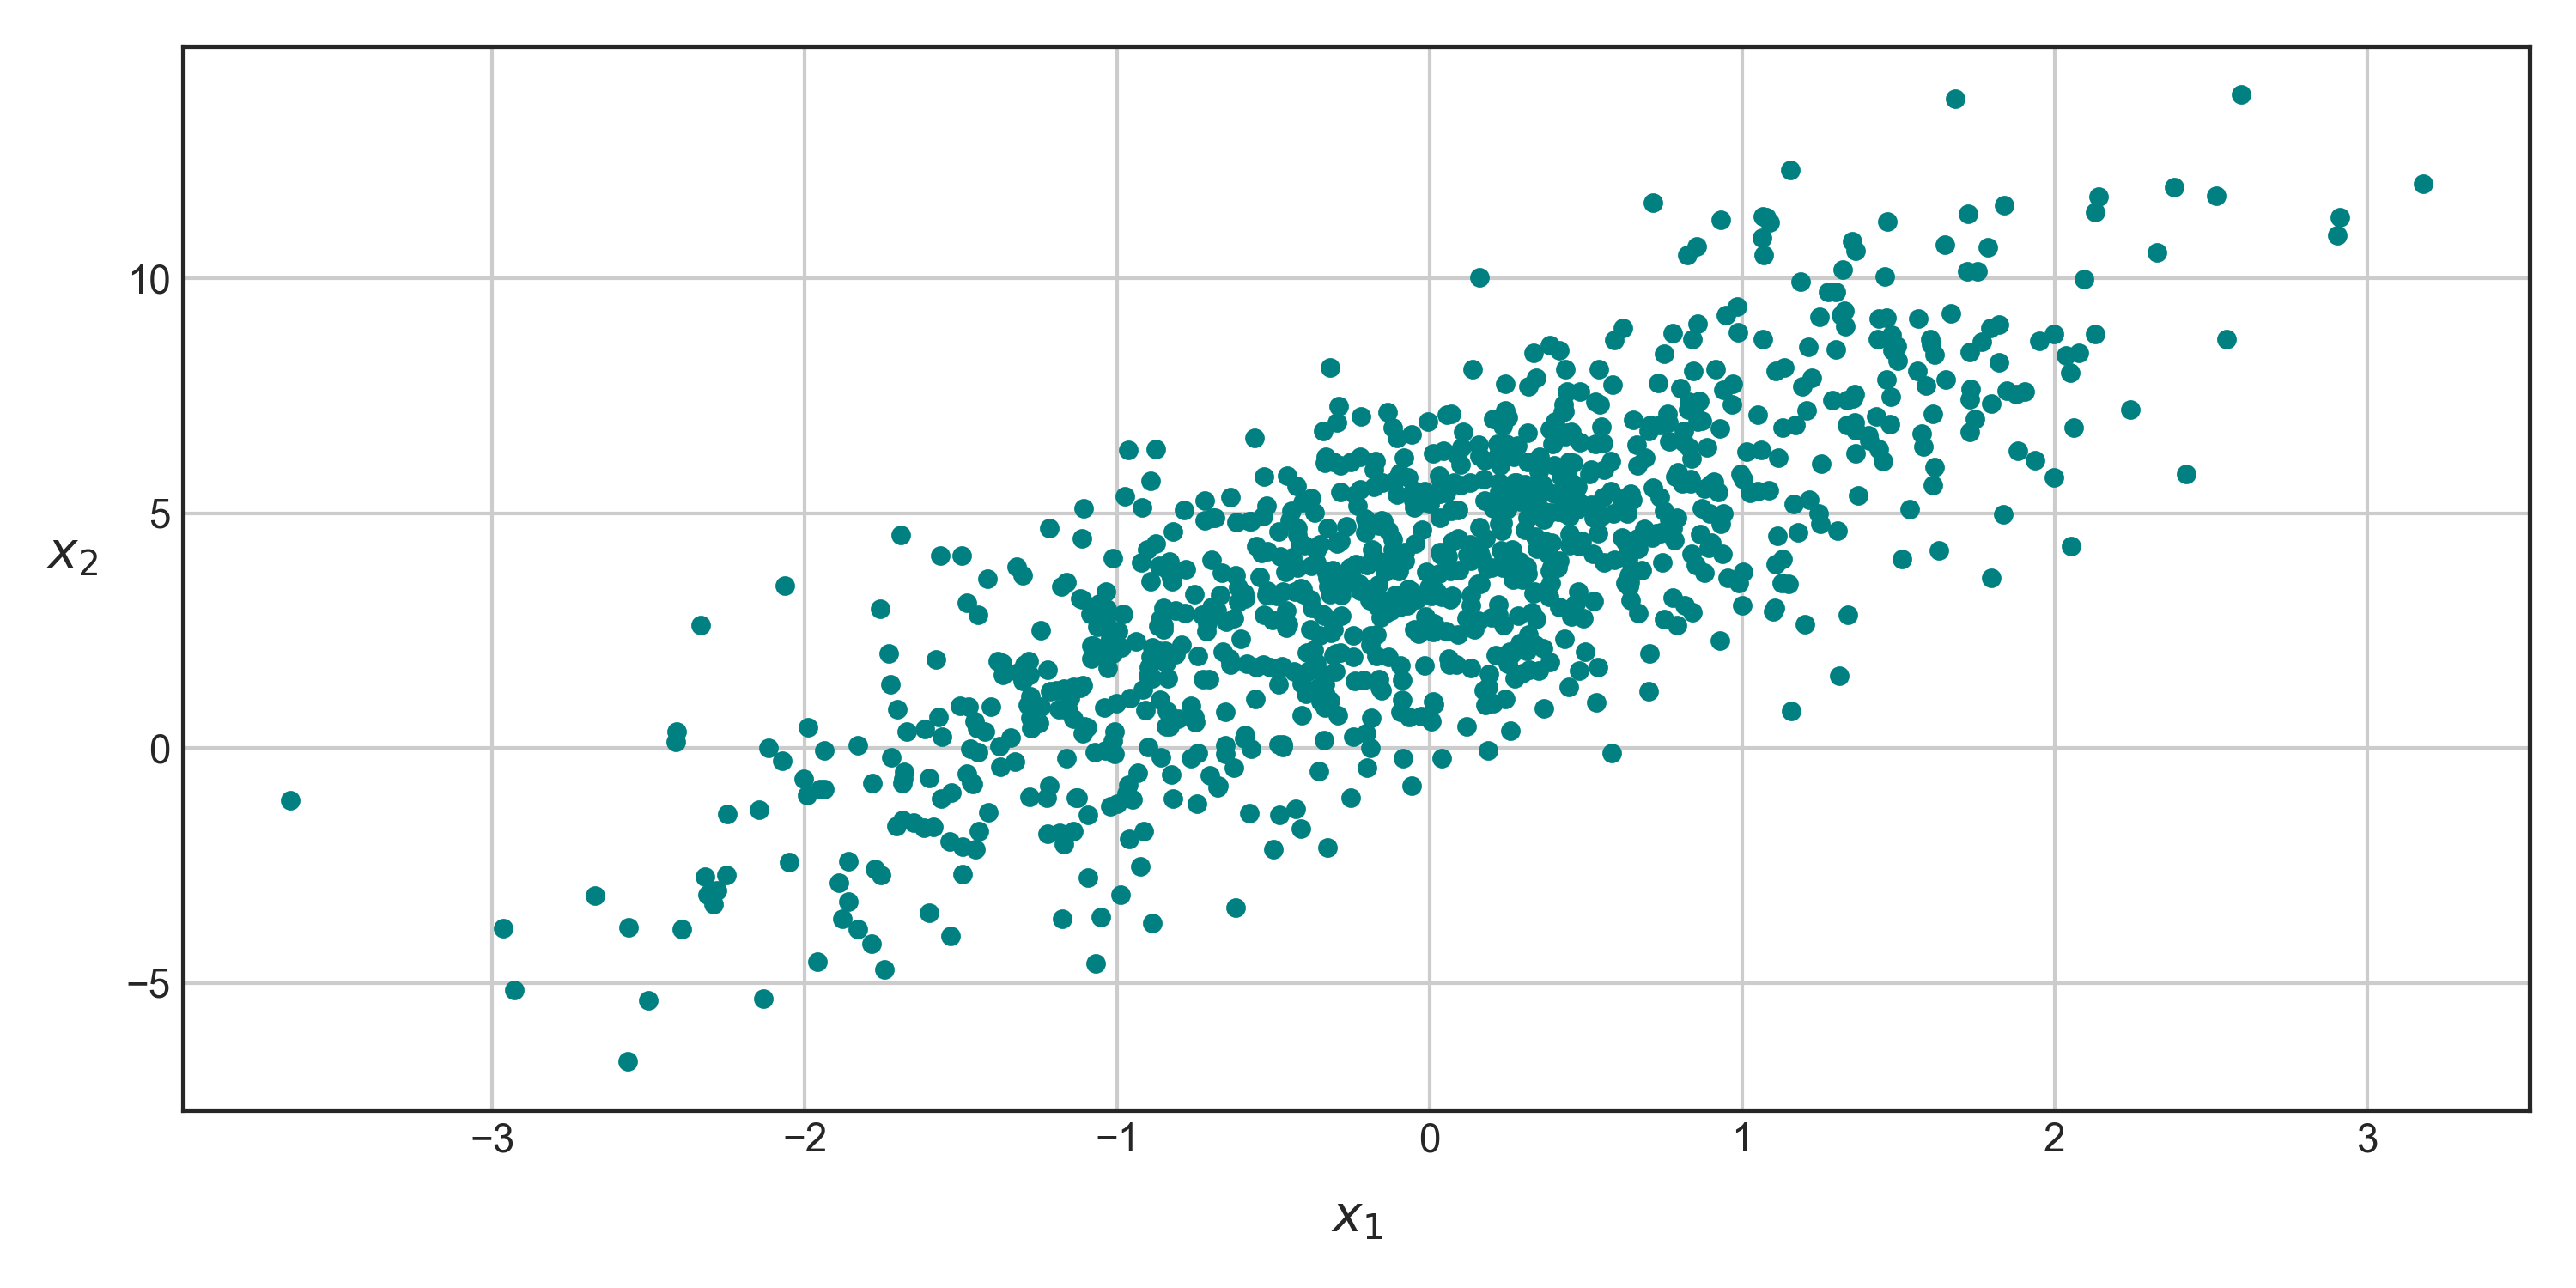

In [8]:
# Visualizamos nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, marker="o", s=20, color="teal")
ax.set_xlabel(r"$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=14, labelpad=15, rotation=0)
ax.grid(True)
plt.tight_layout();

El problema a resolver es entonces $\hat{\mathbf{y} } =b+w\mathbf{x} +\mathbf{\varepsilon } $, donde $b$ y $w$ son los parámetros que debemos estimar.

Debido a que la implementación que hemos construido para el modelo de regresión lineal conforme una estimación por mínimos cuadrados sigue la filosofía de consistencia de la API de **<font color='mediumorchid'>Scikit-Learn</font>**, su aplicación es relativamente simple, conforme lo ya aprendido en la [clase 2.3](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_3.ipynb):

In [9]:
# Inicializamos nuestro modelo.
model = OLSRegression()

In [10]:
# Y lo entrenamos conforme nuestro conjunto de datos previamente construido.
model.fit(X, y)

In [11]:
# Obtenemos predicciones conforme nuestro modelo.
y_pred = model.predict(X)

In [12]:
# Recuperamos los coeficientes de este modelo.
b = model.fit_intercept_
w = model.coef_[0]

In [13]:
# Imprimimos los parámetros estimados.
print("Parámetros estimados por el método de mínimos cuadrados:")
print(f"b = {round(b, 3)}")
print(f"w = {round(w, 3)}")

Parámetros estimados por el método de mínimos cuadrados:
b = 3.837
w = 2.484


Podemos observar que nuestro modelo obtiene estimaciones para $b$ y $w$ bastante cercanas a las originalmente utilizadas para generar el conjunto de datos en primera instancia. Naturalmente, la función regresora construida previamente toma la forma de una recta, la cual podemos visualizar rápidamente como sigue:

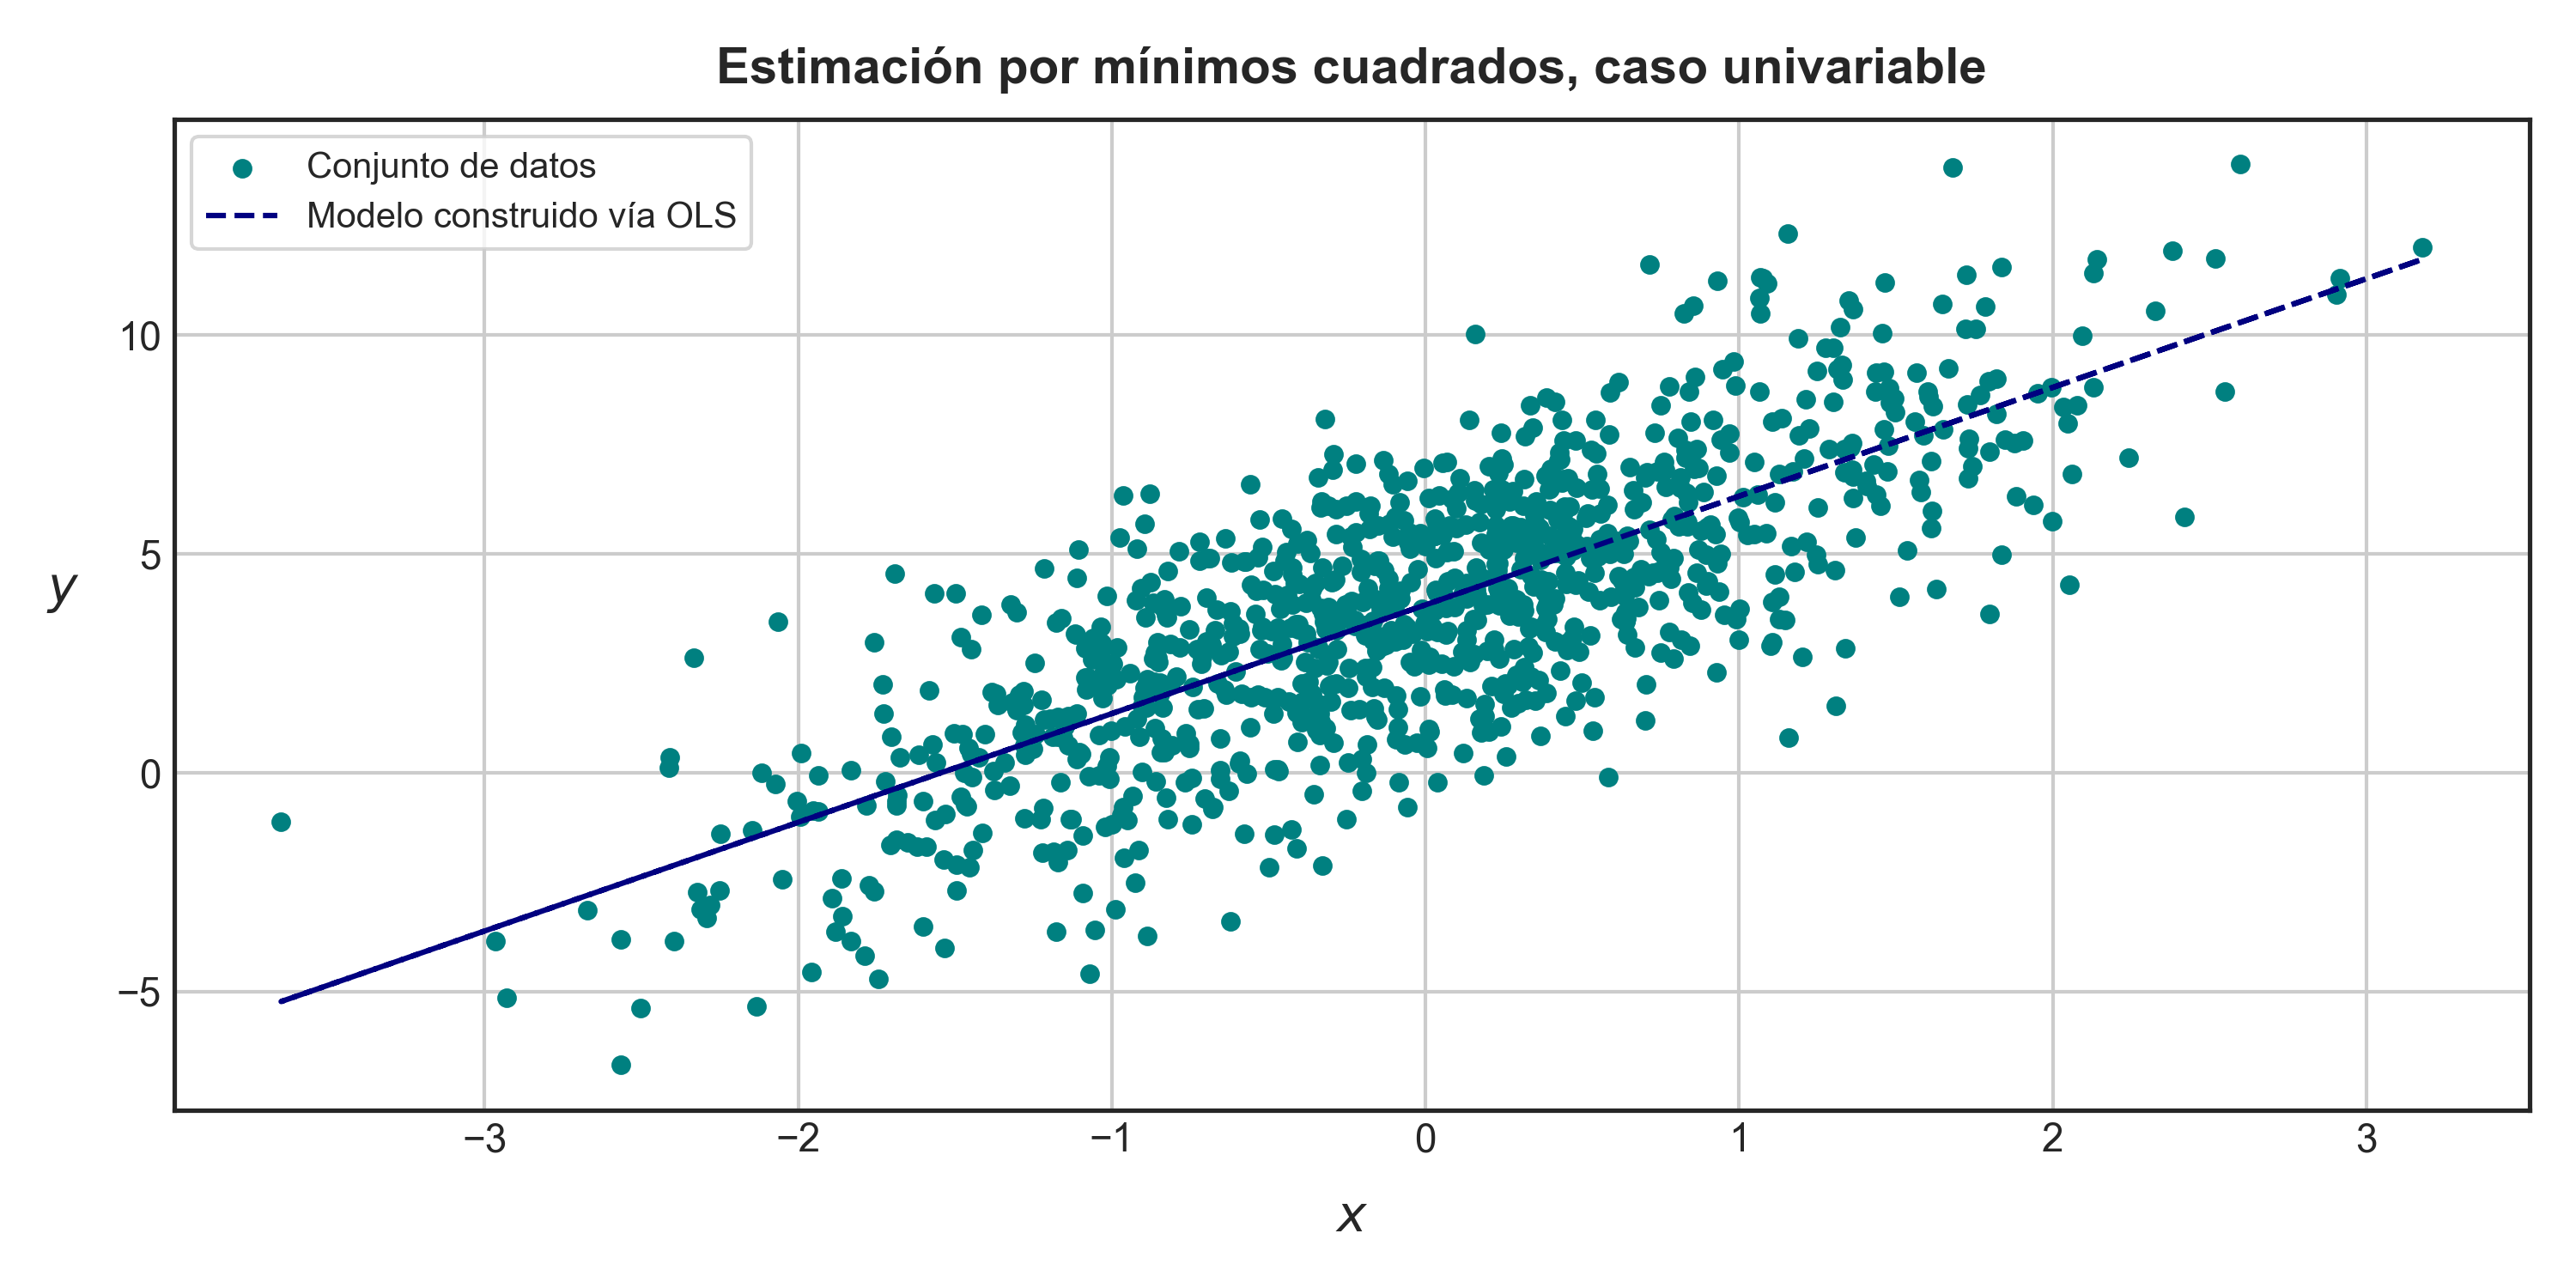

In [14]:
# Visualizamos nuestro conjunto de datos y el modelo construido conforme la estimación por mínimos cuadrados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, marker="o", s=20, color="teal", label="Conjunto de datos")
ax.plot(X, y_pred, linestyle="--", color="navy", lw=1.5, label="Modelo construido vía OLS")
ax.set_xlabel(r"$x$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=14, labelpad=15, rotation=0)
ax.set_title("Estimación por mínimos cuadrados, caso univariable", fontsize=14, pad=10, fontweight="bold")
ax.legend(loc="best", frameon=True, fontsize=10)
ax.grid(True)
plt.tight_layout();

La implementación del método de mínimos cuadrados previamente desarrollada para la construcción de un modelo de regresión lineal es independiente del número de variables independientes que conformen la matriz de datos de entrada $\mathbf{X}$. En efecto, si ahora construimos un conjunto de datos representado por el par $\left( \mathbf{X} ,\mathbf{y} \right)  $ tal que $\mathbf{X} =\left( \mathbf{x}_{1} ,\mathbf{x}_{2} \right)  \in \mathbb{R}^{1000\times 2} \wedge \mathbf{y} \in \mathbb{R}^{1000} $, haciendo uso de la misma semilla aleatoria fija definida previamente, tendremos:

In [15]:
# Creamos ahora un conjunto de datos con dos variables independientes.
X = rng.normal(loc=0, scale=1, size=(1000, 2))
y = -3 + 1.5 * X[:, 0] + 2 * X[:, 1] + rng.normal(loc=0, scale=2, size=1000)

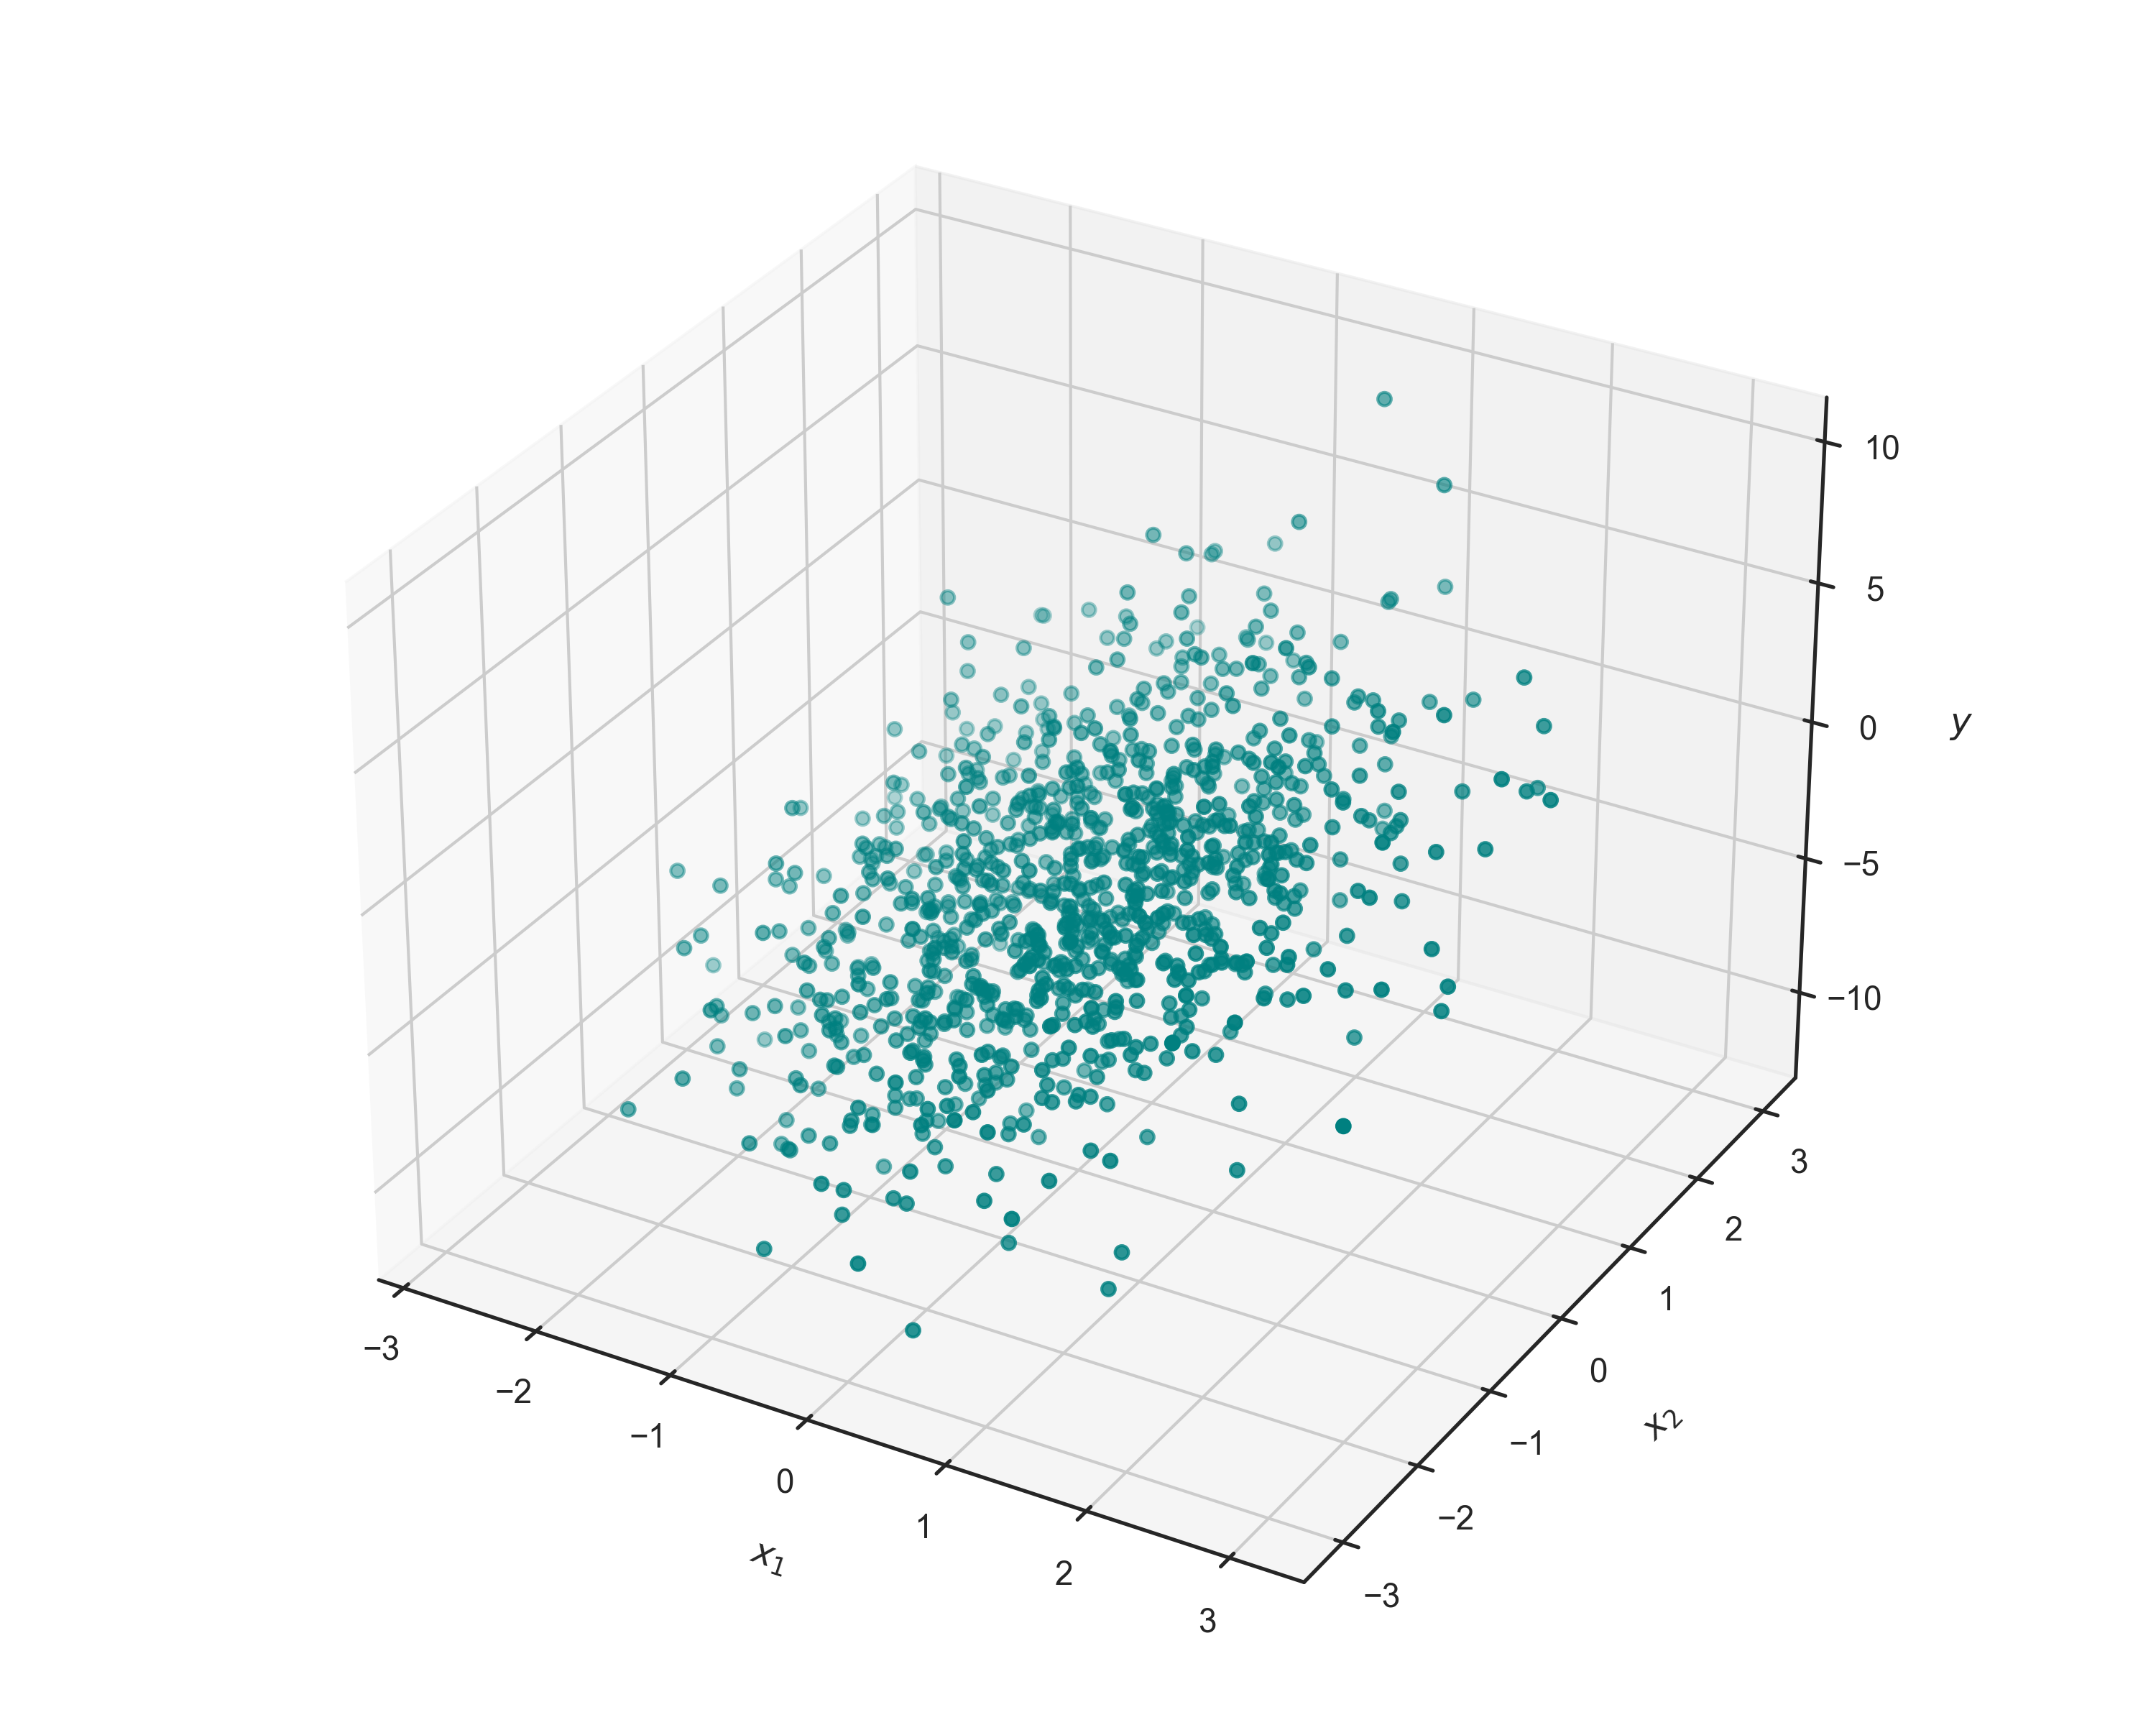

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], y, s=20, color="teal")
ax.set_xlabel(r"$x_{1}$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$y$", fontsize=12, labelpad=10)
plt.tight_layout();

Notemos que, para el conjunto anterior, hemos definido que $\mathbf{y} =-3+1.5\mathbf{x}_{1} +2\mathbf{x}_{2} +\mathbf{\varepsilon } $, donde nuevamente $\mathbf{\varepsilon }$ representa ruido Gaussiano con media nula y desvianción estándar igual a $2$. El problema a resolver es ahora $\hat{\mathbf{y} } =b+w_{1}\mathbf{x}_{1} +w_{2}\mathbf{x}_{2} +\mathbf{\varepsilon } $, donde $b,w_{1}$ y $w_{2}$ son los parámetros a estimar.

Como antes, la aplicación de la clase previamente definida es directa:

In [17]:
# Inicializamos nuestro modelo.
model_2 = OLSRegression()

In [18]:
# Y lo entrenamos conforme nuestro conjunto de datos previamente construido.
model_2.fit(X, y)

In [19]:
# Obtenemos predicciones conforme nuestro modelo.
y_pred = model_2.predict(X)

In [20]:
# Recuperamos los coeficientes de este modelo.
b = model_2.fit_intercept_
w1 = model_2.coef_[0]
w2 = model_2.coef_[1]

In [21]:
# Imprimimos los parámetros estimados.
print("Parámetros estimados por el método de mínimos cuadrados:")
print(f"b = {round(b, 3)}")
print(f"w1 = {round(w1, 3)}")
print(f"w2 = {round(w2, 3)}")

Parámetros estimados por el método de mínimos cuadrados:
b = -3.041
w1 = 1.421
w2 = 1.955


Y nuevamente obtenemos estimaciones muy cercanas a los valores reales.

La función regresora ahora describe un plano de ecuación $\hat{\mathbf{y} } =\hat{b} +\hat{w}_{1} \mathbf{x}_{1} +\hat{w}_{2} \mathbf{x}_{2} $, siendo $\hat{b},\hat{w}_{1}$ y $\hat{w}_{2}$ las estimaciones realizadas para $b,w_{1}$ y $w_{2}$, respectivamente. Podemos visualizar fácilmente este plano en **<font color='mediumorchid'>Scikit-Learn</font>** mediante la incorporación de una grilla tridimensional limitada, en cada dimensión, por los valores extremos de cada una de las variables independientes que conforman a la matriz $\mathbf{X}$. De esta manera, tenemos:

In [22]:
# Generamos el hiperplano que representa nuestra función regresora.
x1 = np.linspace(start=X[:, 0].min(), stop=X[:, 0].max(), num=100)
x2 = np.linspace(start=X[:, 1].min(), stop=X[:, 1].max(), num=100)
X1, X2, = np.meshgrid(x1, x2)
y_pred = b + w1 * X1 + w2 * X2

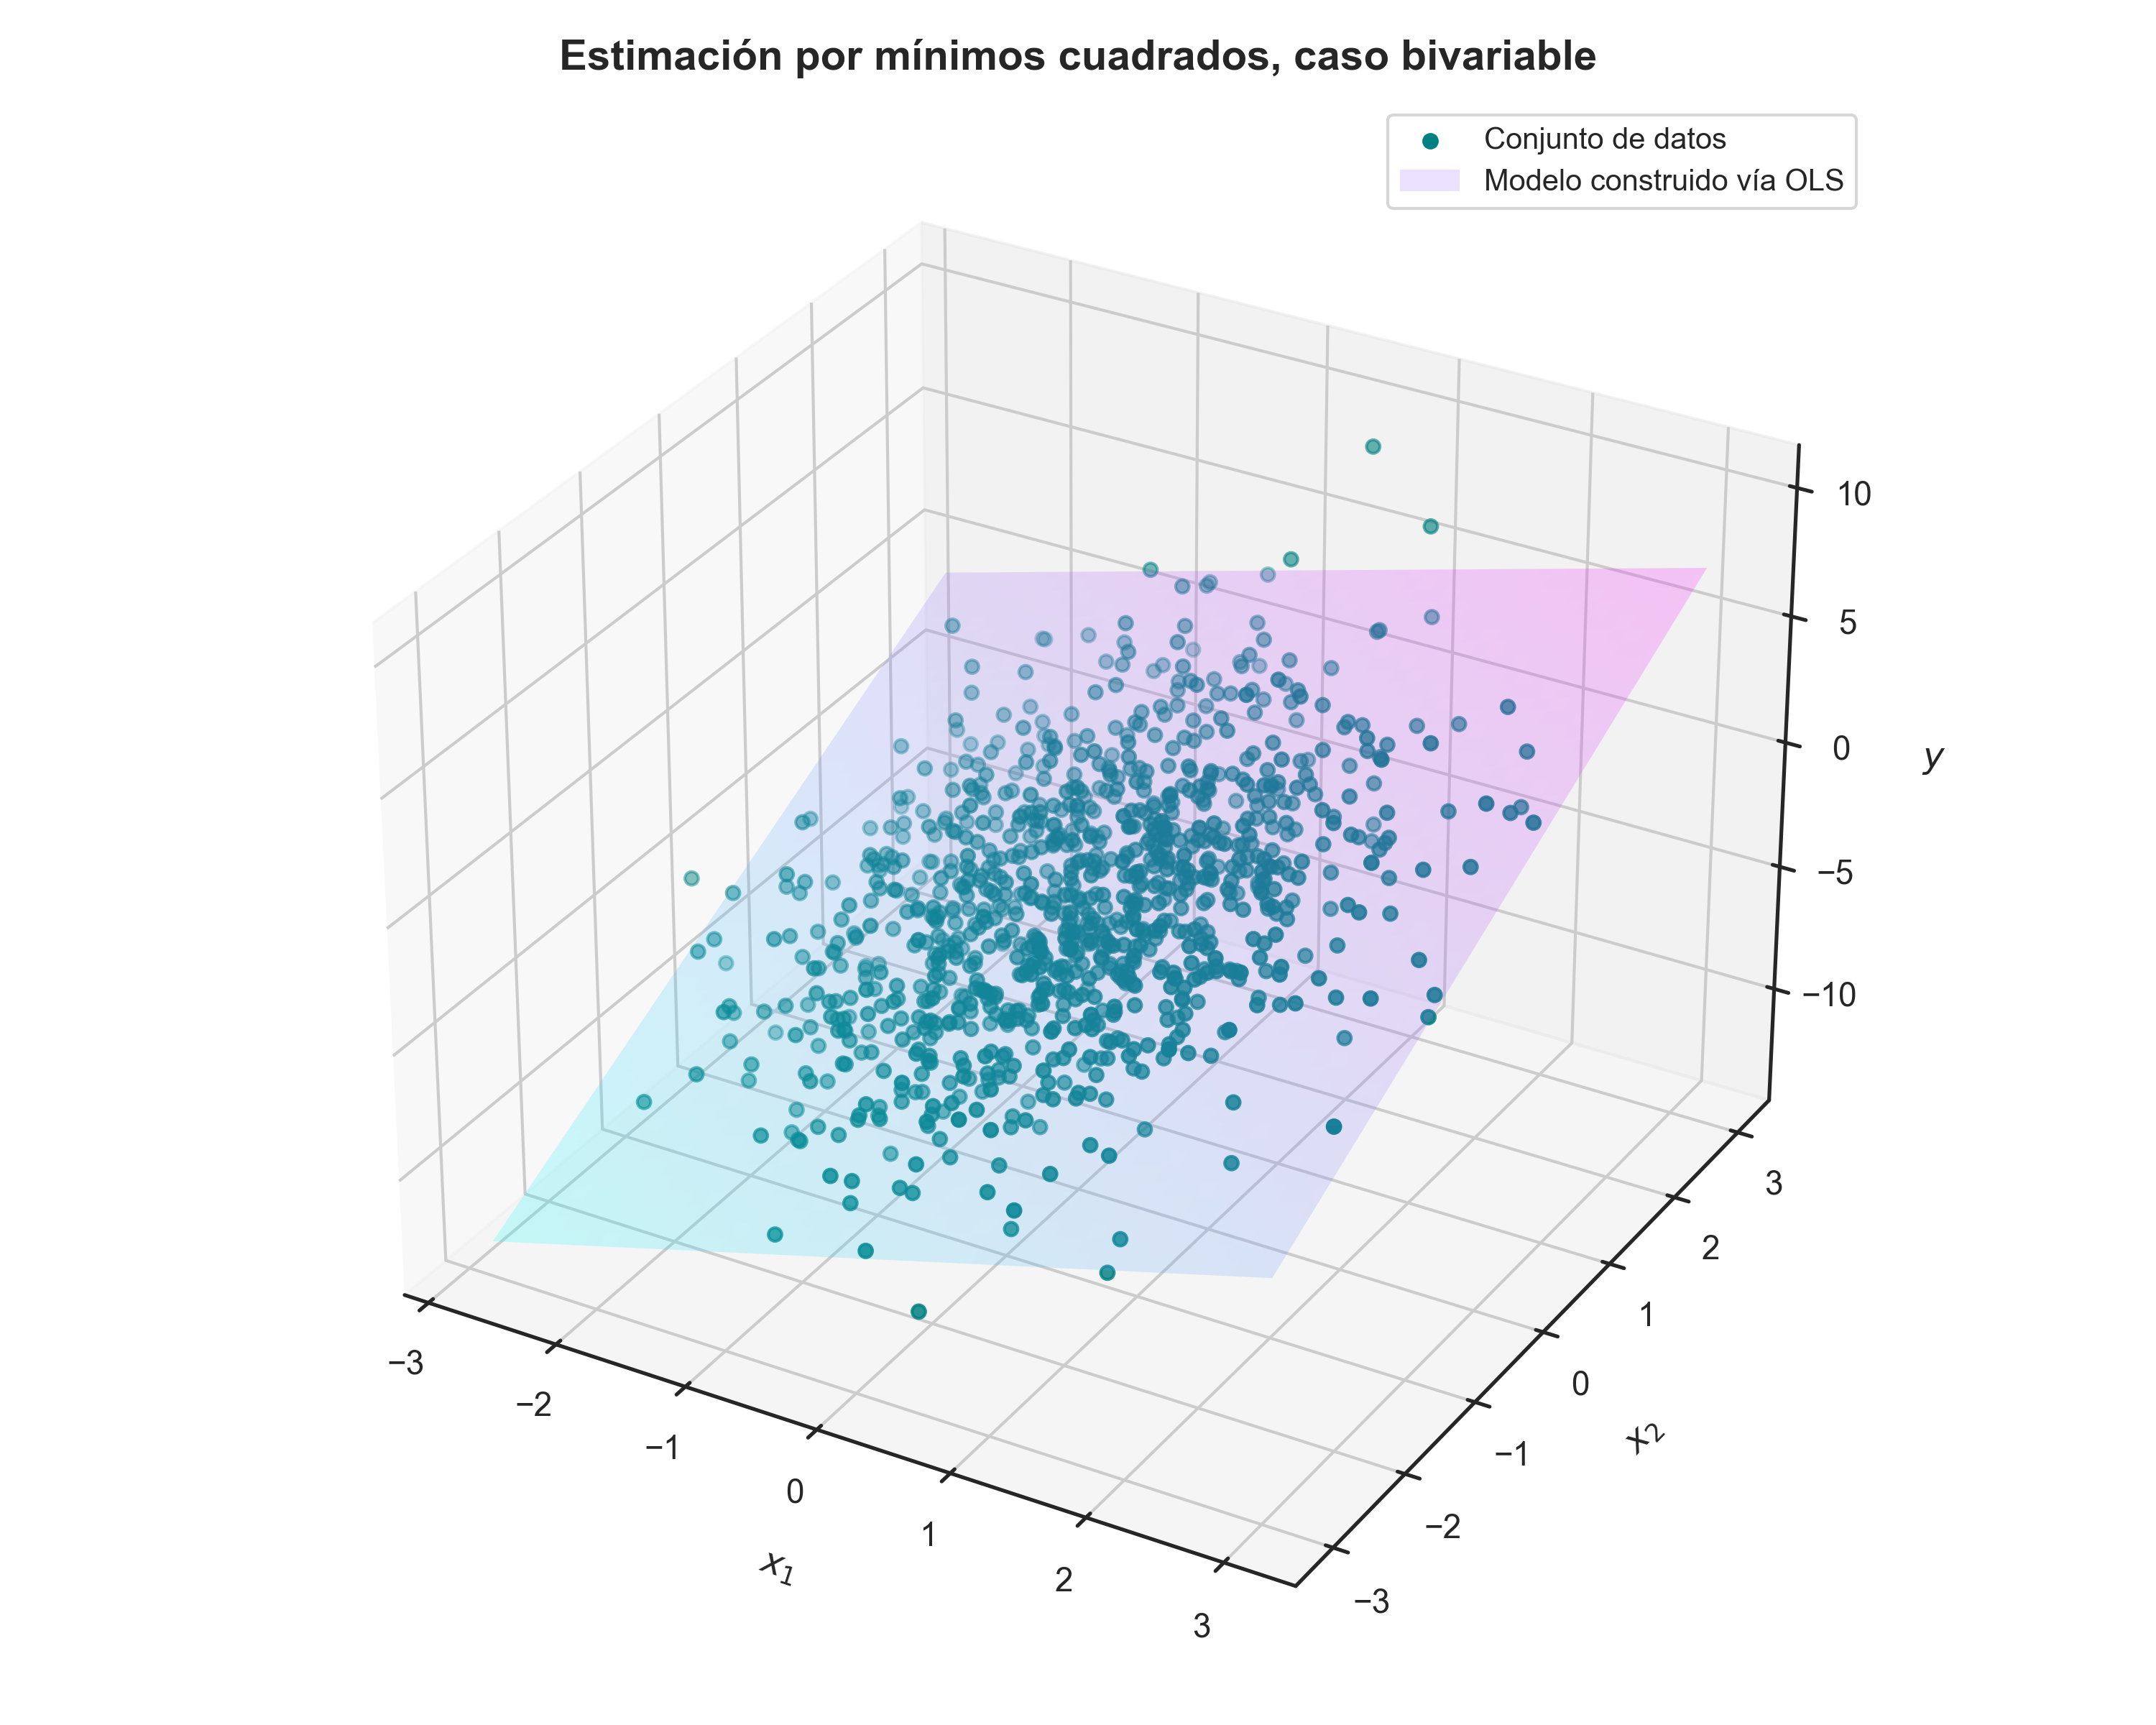

In [23]:
# Visualizamos nuestro conjunto de datos y el modelo construido conforme la estimación por mínimos cuadrados.
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], y, s=20, color="teal", label="Conjunto de datos")
ax.plot_surface(X1, X2, y_pred, cmap="cool", lw=0, alpha=0.2, label="Modelo construido vía OLS")
ax.set_xlabel(r"$x_{1}$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$y$", fontsize=12, labelpad=10)
ax.set_title("Estimación por mínimos cuadrados, caso bivariable", fontsize=14, pad=10, fontweight="bold")
ax.legend(loc="best", frameon=True, fontsize=10)
plt.tight_layout();

Los problemas resueltos previamente son casos muy simples que no deben tomarse como una norma general de los casos de estudio que enfrentaremos en el mundo real. De hecho, incluso, en estos ejemplos hemos definido con anterioridad los valores *reales* de los coeficientes de regresión, lo que nos ha dado una idea de donde debíamos llegar con nuestros modelos. Por supuesto, este difícilmente sea el caso en un contexto más real. ◼︎